In [1]:
from google.colab import drive
drive.mount("/content/drive")
import os
os.chdir("/content/drive/MyDrive/BERT")
import numpy as np
import random
import pandas as pd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Overview**

When analysing result from the first model (with f1_score average ~ 78%), i realized that some classes has same meaning or different meaning but contain a number of text with similar grammar and vocab.

That was considered being made by mistakes when labeling data.

Unfortunately, that norm effects to not only the perfomance but also the convergence of model.

# Below is the f1_scores calculated for each class.

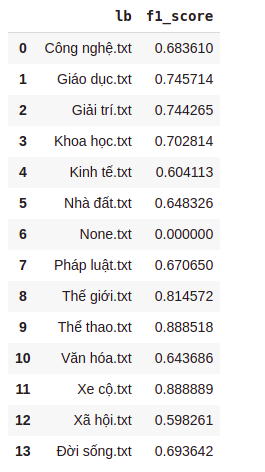

Obviously, some classes show very terrible result in comparison with others. Specially, the None class (not has particular domain) nearly can not have any right predictions.

In [2]:
dataset = {"data": [] , "label": []}

In [3]:
def read_data(path):
    with open(path) as f:
      data = f.readlines()
    for i in range(len(data)):
      data[i] = data[i][:-1]
    return data

In [4]:
dataset["data"] = np.array(read_data("200k_full_length_dataset/data.txt"))
dataset["label"] = np.array(read_data("200k_full_length_dataset/label.txt"))

# I collected result from older model and did some analysing.

Take a look at classes, intuitively there may be some relationship with four classes namely: Giải trí, Văn hóa, Xã hội, Đời sống.

Technically, taking the embedding of samples after bert phase and computing the cosine-similarities shows that three classes including: Xã hội, Kinh tế and Nhà đất have strong correlation relationship with each others.

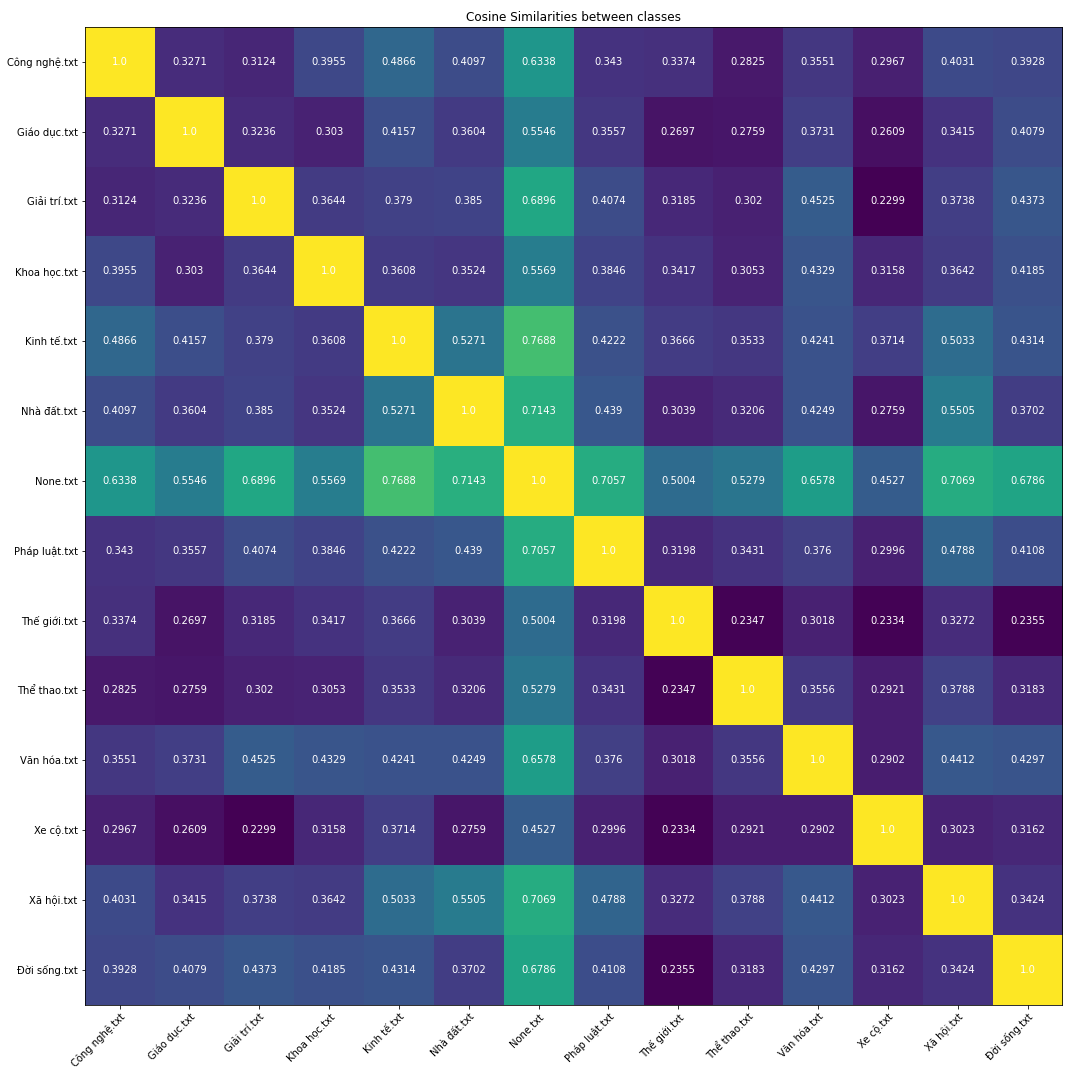

To get that insight, i set a theshold to 0.5, that means any couple has cosine-similarity bigger than 0.5 will be grouped together.

# Solution

I suggest removing None class and merging 3 related classes into one (name "Xã hội").

After processing, the dataset will have 8 classes with a big one (because this class has all example of 3 related classes).

In [5]:
"""
Transform dataset to csv format
"""

dataset_csv = pd.DataFrame(dataset)

In [6]:
"""
Removing None class from dataset
"""

dataset_csv = dataset_csv[dataset_csv["label"] != "None.txt"]

In [7]:
"""
Merging 6 classes into one
"""

related_classes = ["Kinh tế.txt", "Nhà đất.txt", "Xã hội.txt"]
dataset_csv["label"] = dataset_csv["label"].apply(lambda x: "Xã hội.txt" if x in related_classes else x)

In [8]:
"""
Train test split
"""

dataset_csv = dataset_csv.sample(frac = 1)
dataset_csv = dataset_csv.reset_index(drop = True)

test_csv = dataset_csv.iloc[:50000]
dataset_csv = dataset_csv.iloc[50000:].reset_index(drop = True)

In [9]:
"""
Save file to drive
"""

test_csv.to_csv("test_file.csv", index = False)

dataset_csv.to_csv("dataset_original.csv", index = False)